# Credit Card Lead Pred

# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
train_df = pd.read_csv("/content/Credit_card/train_s3TEQDk.csv")
test_df = pd.read_csv("/content/Credit_card/test_mSzZ8RL.csv")
submission_df = pd.read_csv("/content/Credit_card/sample_submission_eyYijxG.csv")

In [3]:
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [5]:
submission_df.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


### shape of the train and test data

In [8]:
print(train_df.shape)
print(test_df.shape)


(245725, 11)
(105312, 10)


### Difference in the coloumns of train and test dataframe

In [9]:
print((train_df.columns).difference(test_df.columns))

Index(['Is_Lead'], dtype='object')


### Checking for the null values using graph

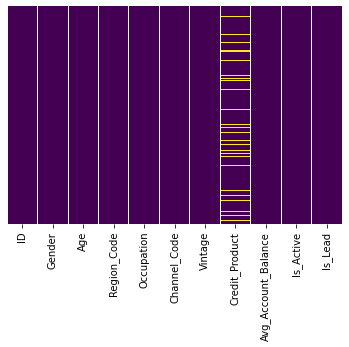

In [10]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Droping the null values row wise

In [11]:
train_df = train_df.dropna()

### Setting IT as index of the train Dataframe

In [12]:
train_df.set_index('ID',inplace=True)

In [13]:
train_df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


### Getting Dummy variables for the categorical values present in the train Dataframe

In [14]:
train_df=pd.get_dummies(train_df, columns=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'])

### Counting of Label class

In [15]:
train_df['Is_Lead'].value_counts()

0    183087
1     33313
Name: Is_Lead, dtype: int64

### Plotting Label class

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


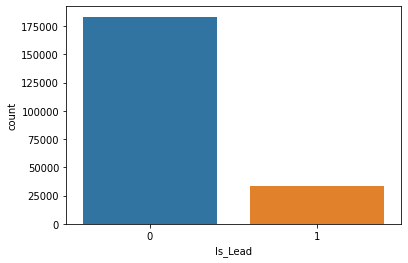

In [16]:
sns.countplot(train_df['Is_Lead'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


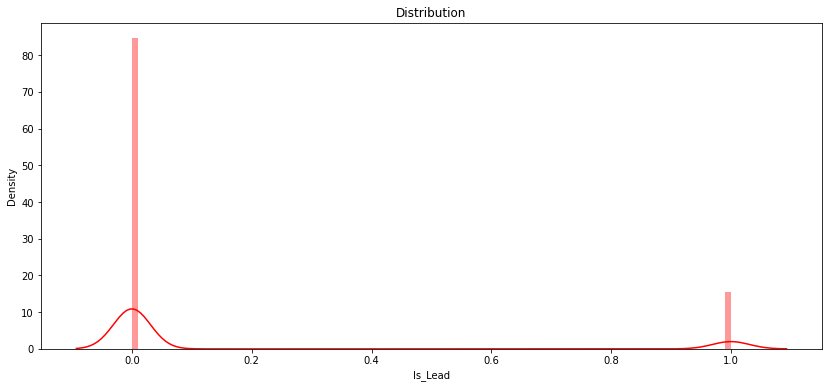

In [17]:
plt.figure(figsize=(14,6))
sns.distplot(train_df['Is_Lead'],bins=100,color='r')
plt.title('Distribution')
plt.show()

### From the above two graphs we can conclude that our dataset is imbalanced but have a normal distribution

### Splitting the train Dataframe into train and test

In [18]:
y=train_df['Is_Lead']
x=train_df.drop('Is_Lead',axis=1)
x.shape

(216400, 52)

###Work on test dataframe

In [19]:

test_df=pd.get_dummies(test_df, columns=['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active'])

test_df.set_index('ID',inplace=True)
x_test_final=test_df[:]
x_test_final.shape

(105312, 52)

In [20]:
test_df.head()

,Age,Vintage,Avg_Account_Balance,Gender_Female,Gender_Male,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_No,Is_Active_Yes
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
VBENBARO,29,25,742366,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0
CCMEWNKY,43,49,925537,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
VK3KGA9M,31,14,215949,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
TT8RPZVC,29,33,868070,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
SHQZEYTZ,29,19,657087,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0


# Random Forest

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [22]:
from collections import Counter
Counter(y_train)

Counter({0: 146444, 1: 26676})

In [23]:


from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier().fit(x_train, y_train)
rand_y_pred = rand_clf.predict(x_test)

In [24]:
rand_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
print(accuracy_score(y_test, rand_y_pred))
print(classification_report(y_test, rand_y_pred))
print(confusion_matrix(y_test, rand_y_pred))

0.849630314232902
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     36643
           1       0.52      0.25      0.34      6637

    accuracy                           0.85     43280
   macro avg       0.70      0.61      0.63     43280
weighted avg       0.82      0.85      0.83     43280

[[35080  1563]
 [ 4945  1692]]


# SMOTE

In [26]:
from imblearn.combine import SMOTETomek
sm=SMOTETomek(0.75)
x_train_sm,y_train_sm=sm.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_sm)))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


The number of classes before fit Counter({0: 146444, 1: 26676})
The number of classes after fit Counter({0: 130875, 1: 94264})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight='balanced')
classifier.fit(x_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[34819  1824]
 [ 4762  1875]]
0.8478280961182995
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     36643
           1       0.51      0.28      0.36      6637

    accuracy                           0.85     43280
   macro avg       0.69      0.62      0.64     43280
weighted avg       0.82      0.85      0.83     43280



In [36]:
y_pred_final=classifier.predict(x_test_final)



In [37]:
submission_df['Is_Lead'] = y_pred_final

In [38]:
submission_df.to_csv('submission3.csv',index=False)

### Trying for hyperparameter tuning using GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [2,4],
    'max_features': [2, 3],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 5],
    'n_estimators': [20]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = classifier, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  1.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [30]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 20}

In [34]:
print(grid_search.score(x_train,y_train))


0.624393484288355


In [35]:
y_pred_grid=grid_search.predict(x_test)
print(confusion_matrix(y_test,y_pred_grid))
print(accuracy_score(y_test,y_pred_grid))
print(classification_report(y_test,y_pred_grid))

[[21910 14733]
 [ 1480  5157]]
0.6253927911275415
              precision    recall  f1-score   support

           0       0.94      0.60      0.73     36643
           1       0.26      0.78      0.39      6637

    accuracy                           0.63     43280
   macro avg       0.60      0.69      0.56     43280
weighted avg       0.83      0.63      0.68     43280

